In [1]:
import shap
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, ElasticNet

from classification import patient_fpath, maternal_fpath, longitudinal_fpath, label_fpath, medication_fpath, feeding_fpath, has_probiotics_fpath, probiotics_fpath
from regression import label_fpath as reg_label_fpath

from util import *

shap.initjs()

feeding_week1 = ['feeding_week1_number_days_breastmilk', 'feeding_week1_number_days_donated', 'feeding_week1_number_days_formula', 'feeding_week1_qty_breastmilk', 'feeding_week1_qty_donated', 'feeding_week1_qty_formula']
feeding_week2 = ['feeding_week2_number_days_breastmilk', 'feeding_week2_number_days_donated', 'feeding_week2_number_days_formula', 'feeding_week2_qty_breastmilk', 'feeding_week2_qty_donated', 'feeding_week2_qty_formula']
medication_week1 = ['medication_week1_had_medication', 'medication_week1_medication_amp_gen', 'medication_week1_medication_other_antibiotics']
medication_week2 = ['medication_week2_had_medication', 'medication_week2_medication_amp_gen', 'medication_week2_medication_other_antibiotics']
probiotics_week1 = ['probiotics_week1_has_probiotics', 'probiotics_week1_infloran', 'probiotics_week1_lb2']
probiotics_week2 = ['probiotics_week2_has_probiotics', 'probiotics_week2_infloran', 'probiotics_week2_lb2']


def perturbation_analysis(clf, longitudinal_period = None, X = None):
    if type(clf).__name__ == 'str':
        clf = pickle.load(open(clf, 'rb'))
    if X == None:
        if type(clf).__name__ == 'LogisticRegression':
            is_regression = False
            if longitudinal_period == None:
                raise AttributeError('Should specify X or longitudinal_period for classification task')
        else:
            is_regression = True
            longitudinal_period = 7
        true_label_fpath = reg_label_fpath if is_regression else label_fpath
        X = preprocess_features(patient_fpath, 
                                maternal_fpath, 
                                longitudinal_fpath, 
                                medication_fpath, 
                                feeding_fpath, 
                                true_label_fpath, 
                                use_dc = False, 
                                longitudinal_period = longitudinal_period, 
                                use_feeding = True, 
                                use_medication = True, 
                                use_probiotics = has_probiotics_fpath, 
                                probiotics_fpath = probiotics_fpath, 
                                is_regression = is_regression)
        label_table = pd.read_csv(true_label_fpath)[['Astarte ID', 'TypDev']]
        id_list = list(X['Astarte ID'])
        X = X.drop(labels = ['Astarte ID', '36 Weeks PMA'], axis = 1)
        columns = list(X.columns)
        print(columns)
        X = X.to_numpy()
        random_miss, imputed_features = impute_features(X)
        X = pd.DataFrame(data = imputed_features, columns = columns)
        X['Astarte ID'] = id_list
        X = X.merge(label_table, on = 'Astarte ID', how = 'inner')
        X = X.sort_values('TypDev', axis = 0, ascending = True)
        X = X.drop(labels = ['Astarte ID', 'TypDev'], axis = 1)
    explainer = shap.LinearExplainer(clf, X)
    shap_values = explainer.shap_values(X)
    return explainer.expected_value, shap_values, X

def idx_of_column(X, lst):
    columns = X.columns.to_list()
    res = []
    for i in lst:
        res.append(columns.index(i))
    return res

## Classification with LogisticRegression on Day 1-57 with Medication, Feeding, and Probiotics

In [2]:
a, b, c = perturbation_analysis('../results/results_09_10_2020_normal_label_new/feeding_True_medication_True_site_False_filter_False/logistic_model_29.pickle', longitudinal_period=29)

shap.force_plot(a, b, c)

['GA', 'Birth PMA', 'Birthweight', 'Mode of Delivery', 'Multiple Gestation', 'Gender', 'Birth Z-Score', 'Weight_day_1', 'Weight_day_15', 'Weight_day_29', 'PMA_day_1', 'PMA_day_15', 'PMA_day_29', 'Maternal Age', 'medication_week1_had_medication', 'medication_week1_medication_amp_gen', 'medication_week1_medication_other_antibiotics', 'medication_week2_had_medication', 'medication_week2_medication_amp_gen', 'medication_week2_medication_other_antibiotics', 'medication_week3_had_medication', 'medication_week3_medication_amp_gen', 'medication_week3_medication_other_antibiotics', 'medication_week4_had_medication', 'medication_week4_medication_amp_gen', 'medication_week4_medication_other_antibiotics', 'feeding_week1_number_days_breastmilk', 'feeding_week1_number_days_donated', 'feeding_week1_number_days_formula', 'feeding_week1_qty_breastmilk', 'feeding_week1_qty_donated', 'feeding_week1_qty_formula', 'feeding_week2_number_days_breastmilk', 'feeding_week2_number_days_donated', 'feeding_week2_n

# Week 1 feeding

(359, 62)


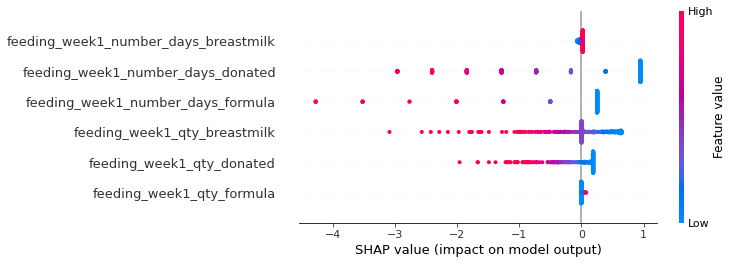

In [3]:
print(b.shape)

shap.summary_plot(b[:, idx_of_column(c, feeding_week1)], c[feeding_week1], sort = False)

# Week 2 feeding

(359, 62)


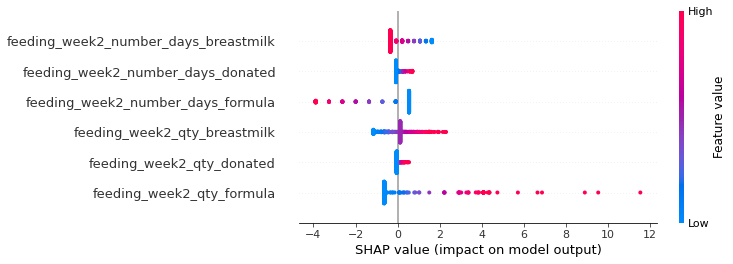

In [4]:
print(b.shape)

shap.summary_plot(b[:, idx_of_column(c, feeding_week2)], c[feeding_week2], sort = False)

# Week 1 medication

(359, 62)


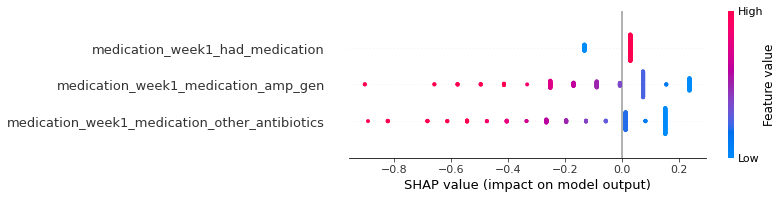

In [5]:
print(b.shape)

shap.summary_plot(b[:, idx_of_column(c, medication_week1)], c[medication_week1], sort = False)

# Week 2 medication

(359, 62)


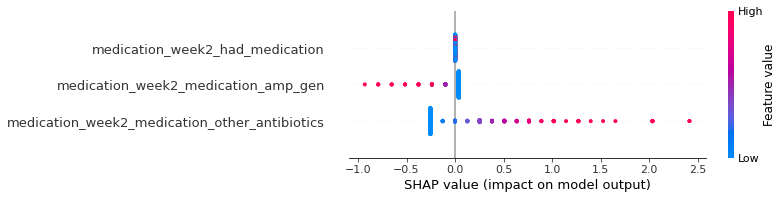

In [6]:
print(b.shape)

shap.summary_plot(b[:, idx_of_column(c, medication_week2)], c[medication_week2], sort = False)

# Week 1 probiotics

(359, 62)


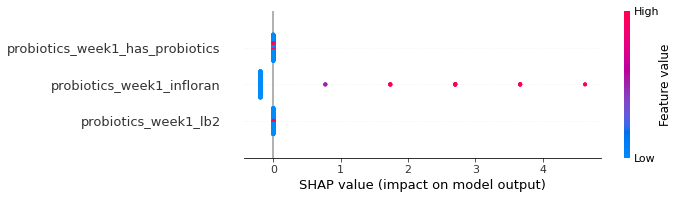

In [7]:
print(b.shape)

shap.summary_plot(b[:, idx_of_column(c, probiotics_week1)], c[probiotics_week1], sort = False)

# Week 2 probiotics

(359, 62)


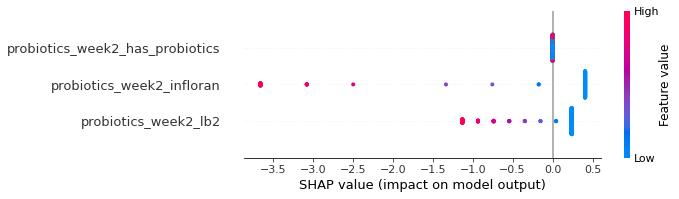

In [8]:
print(b.shape)

shap.summary_plot(b[:, idx_of_column(c, probiotics_week2)], c[probiotics_week2], sort = False)

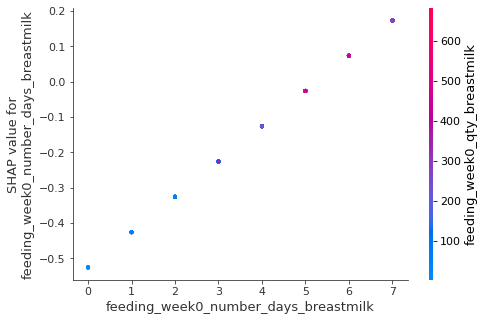

In [28]:
shap.dependence_plot("feeding_week0_number_days_breastmilk", b, c)

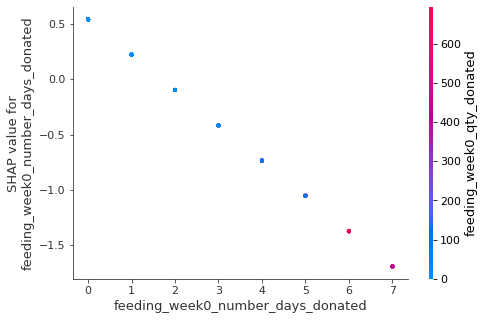

In [29]:
shap.dependence_plot("feeding_week0_number_days_donated", b, c)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


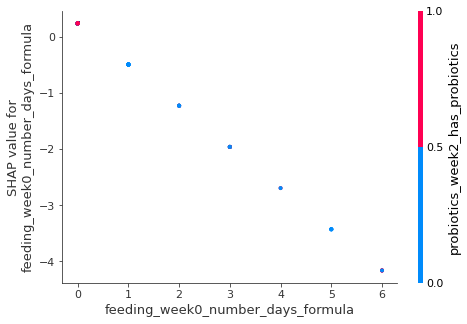

In [30]:
shap.dependence_plot("feeding_week0_number_days_formula", b, c)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


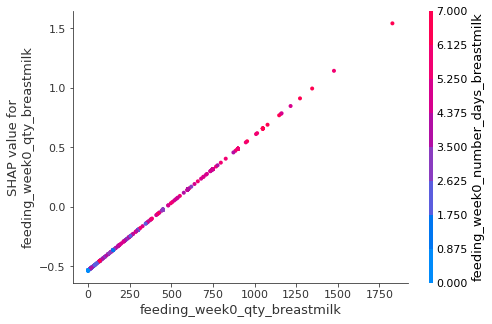

In [8]:
shap.dependence_plot("feeding_week0_qty_breastmilk", b, c)

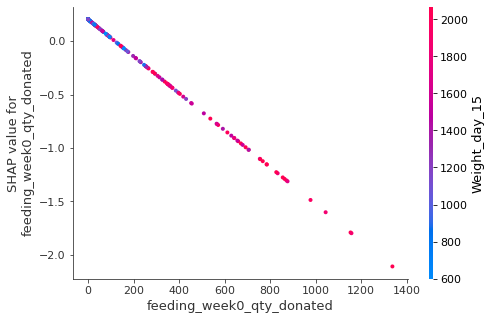

In [9]:
shap.dependence_plot("feeding_week0_qty_donated", b, c)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


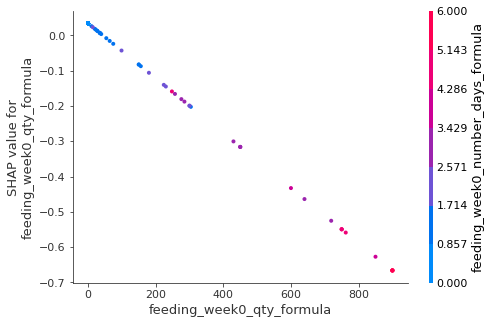

In [10]:
shap.dependence_plot("feeding_week0_qty_formula", b, c)

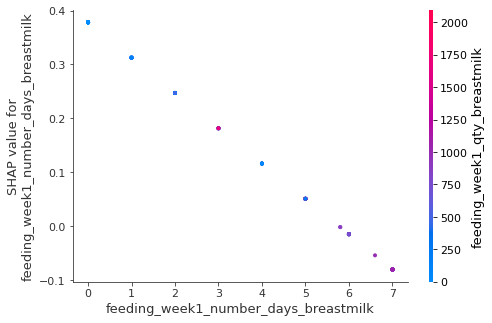

In [11]:
shap.dependence_plot("feeding_week1_number_days_breastmilk", b, c)

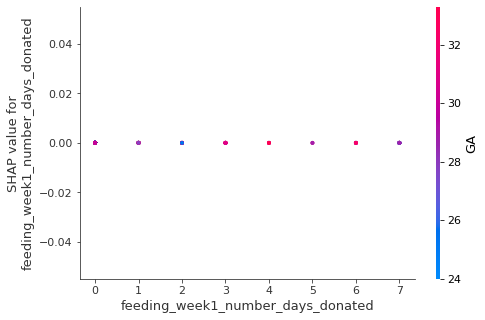

In [12]:
shap.dependence_plot("feeding_week1_number_days_donated", b, c)

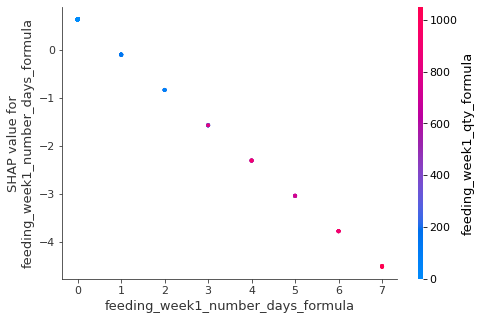

In [13]:
shap.dependence_plot("feeding_week1_number_days_formula", b, c)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


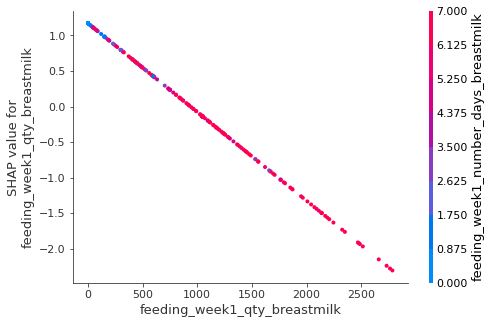

In [14]:
shap.dependence_plot("feeding_week1_qty_breastmilk", b, c)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


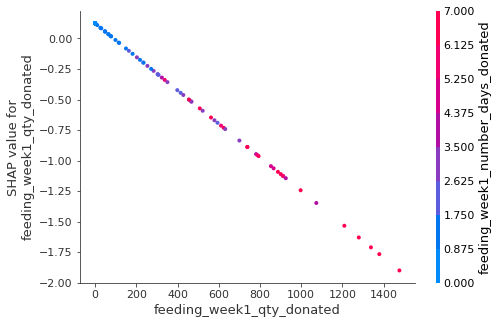

In [15]:
shap.dependence_plot("feeding_week1_qty_donated", b, c)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


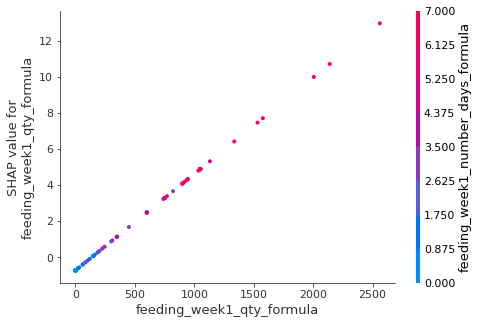

In [16]:
shap.dependence_plot("feeding_week1_qty_formula", b, c)

## Regression with Lasso on Day 1-7 with Medication, Feeding, and Probiotics

In [17]:
a, b, c = perturbation_analysis('../results/regression_results_08_26_2020_weight/feeding_True_medication_True_site_False_filter_False/lasso_model_7.pickle', longitudinal_period=57)

shap.force_plot(a, b, c)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['GA', 'Birth PMA', 'Birthweight', 'Mode of Delivery', 'Multiple Gestation', 'Gender', 'Birth Z-Score', 'Weight_day_1', 'Weight_day_15', 'PMA_day_1', 'PMA_day_15', 'Maternal Age', 'medication_week0_has_medication', 'medication_week0_has_antibiotic', 'medication_week0_has_others', 'medication_week1_has_medication', 'medication_week1_has_antibiotic', 'medication_week1_has_others', 'feeding_week0_number_days_breastmilk', 'feeding_week0_number_days_donated', 'feeding_week0_number_days_formula', 'feeding_week0_qty_breastmilk', 'feeding_week0_qty_donated', 'feeding_week0_qty_formula', 'probiotics_week0_has_probiotics', 'probiotics_week0_infloran', 'probiotics_week0_lb2']


(177, 27)


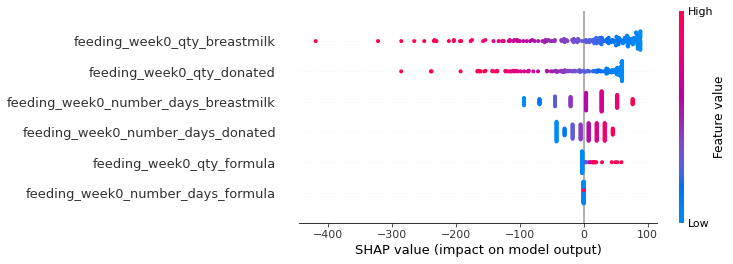

In [18]:
print(b.shape)

shap.summary_plot(b[:, 18:24], c[['feeding_week0_number_days_breastmilk', 'feeding_week0_number_days_donated', 'feeding_week0_number_days_formula', 'feeding_week0_qty_breastmilk', 'feeding_week0_qty_donated', 'feeding_week0_qty_formula']])

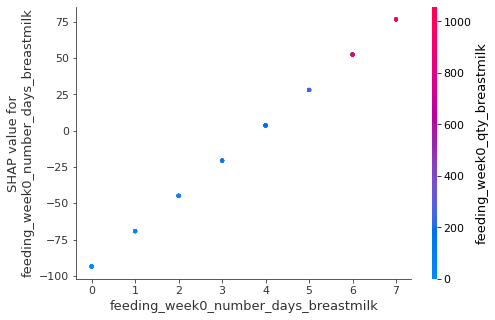

In [19]:
shap.dependence_plot("feeding_week0_number_days_breastmilk", b, c)

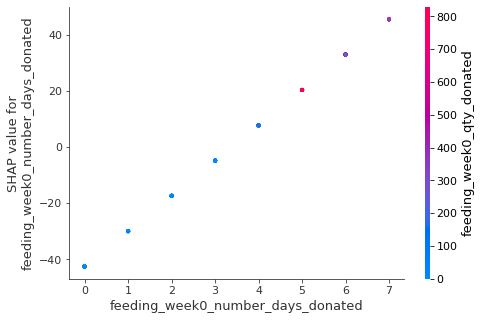

In [20]:
shap.dependence_plot("feeding_week0_number_days_donated", b, c)

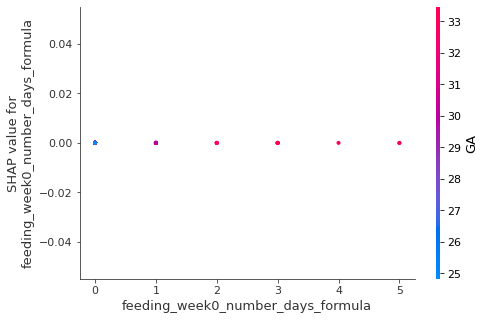

In [21]:
shap.dependence_plot("feeding_week0_number_days_formula", b, c)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


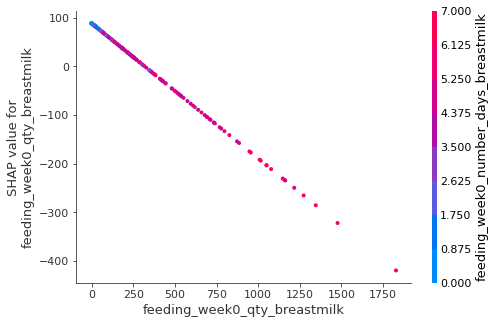

In [22]:
shap.dependence_plot("feeding_week0_qty_breastmilk", b, c)

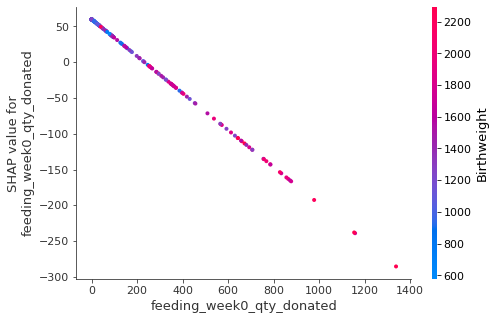

In [23]:
shap.dependence_plot("feeding_week0_qty_donated", b, c)

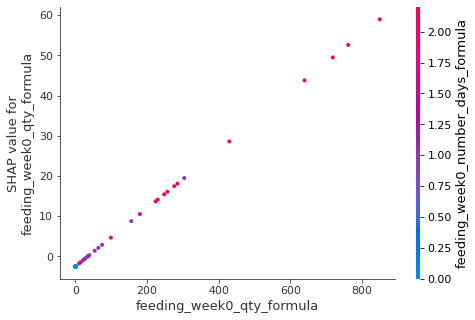

In [24]:
shap.dependence_plot("feeding_week0_qty_formula", b, c)

## Regression with ElasticNet on Day 1-7 with Medication, Feeding, and Probiotics

In [25]:
a, b, c = perturbation_analysis('../results/regression_results_08_26_2020_weight/feeding_True_medication_True_site_False_filter_False/elasticnet_model_7.pickle', longitudinal_period=57)

shap.force_plot(a, b, c)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['GA', 'Birth PMA', 'Birthweight', 'Mode of Delivery', 'Multiple Gestation', 'Gender', 'Birth Z-Score', 'Weight_day_1', 'Weight_day_15', 'PMA_day_1', 'PMA_day_15', 'Maternal Age', 'medication_week0_has_medication', 'medication_week0_has_antibiotic', 'medication_week0_has_others', 'medication_week1_has_medication', 'medication_week1_has_antibiotic', 'medication_week1_has_others', 'feeding_week0_number_days_breastmilk', 'feeding_week0_number_days_donated', 'feeding_week0_number_days_formula', 'feeding_week0_qty_breastmilk', 'feeding_week0_qty_donated', 'feeding_week0_qty_formula', 'probiotics_week0_has_probiotics', 'probiotics_week0_infloran', 'probiotics_week0_lb2']


(177, 27)


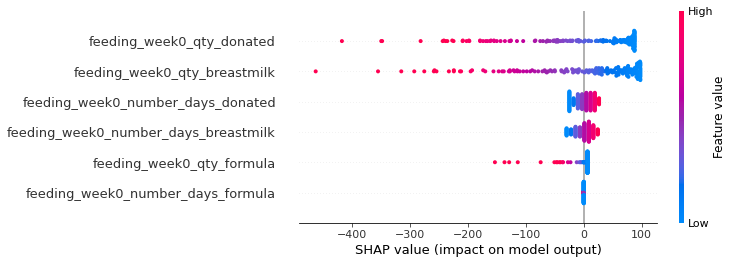

In [26]:
print(b.shape)

shap.summary_plot(b[:, 18:24], c[['feeding_week0_number_days_breastmilk', 'feeding_week0_number_days_donated', 'feeding_week0_number_days_formula', 'feeding_week0_qty_breastmilk', 'feeding_week0_qty_donated', 'feeding_week0_qty_formula']])

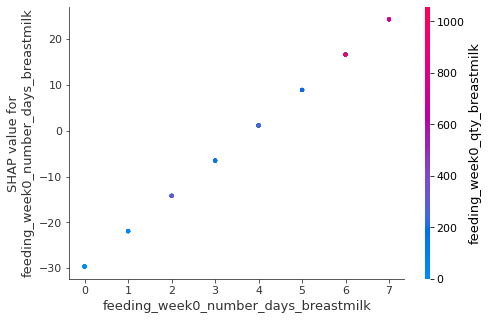

In [27]:
shap.dependence_plot("feeding_week0_number_days_breastmilk", b, c)

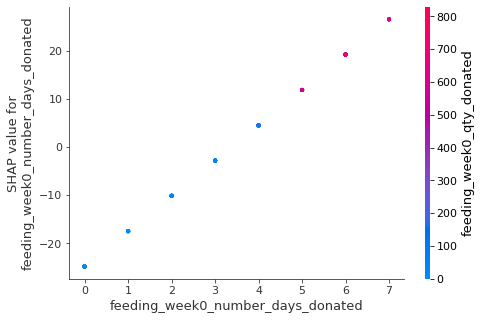

In [28]:
shap.dependence_plot("feeding_week0_number_days_donated", b, c)

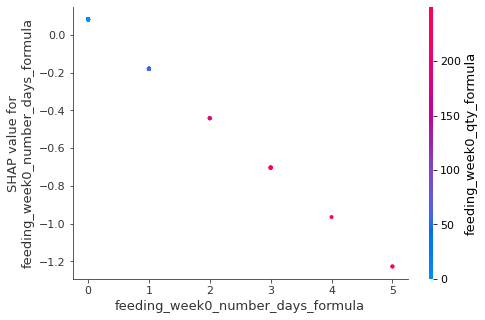

In [29]:
shap.dependence_plot("feeding_week0_number_days_formula", b, c)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


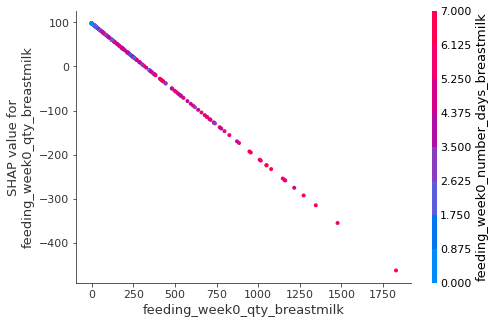

In [30]:
shap.dependence_plot("feeding_week0_qty_breastmilk", b, c)

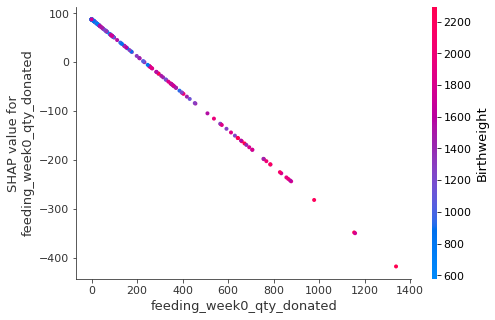

In [31]:
shap.dependence_plot("feeding_week0_qty_donated", b, c)

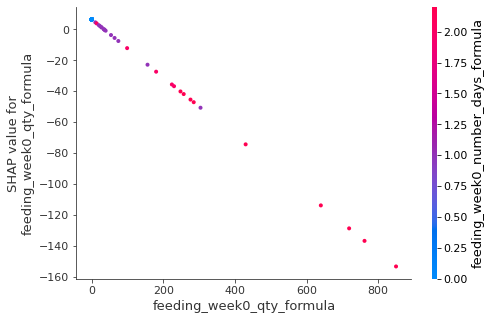

In [32]:
shap.dependence_plot("feeding_week0_qty_formula", b, c)